In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

column_names = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight',
         'shell weight','rings']
data = pd.read_csv('abalone.data',names = column_names)
print("Total Number of samples: %d" % len(data))
data.head(5) # See samples of raw data

Total Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
data.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
# scikit-learn takes only numbers as parameters, so firstly create a binary feature for eahc of the 3 values
for label in "MFI":
    data[label] = data["sex"] == label
del data["sex"]

# convert age to age group
for ix in data.index:
    row = data.loc[ix]
    if row.rings <= 8:
        data.loc[ix, 'rings'] = 'young'
    elif row.rings >= 11:
        data.loc[ix, 'rings'] = 'old'
    elif row.rings >=9 & row.rings <= 10:
        data.loc[ix, 'rings'] = 'medium'

data = data[['length','diameter','height','whole weight','shucked weight',
             'viscera weight','shell weight','M','F','I','rings']]
data.head(5)

<ipython-input-30-5d6af81ad2db>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'old' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[ix, 'rings'] = 'old'


,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,M,F,I,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,True,False,False,old
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,True,False,False,young
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,True,False,medium
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,True,False,False,medium
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,False,False,True,young


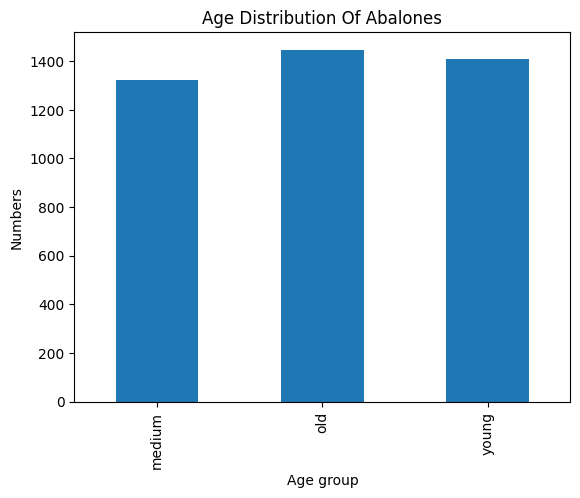

In [ ]:
age_group = data.groupby('rings').rings.count()
ax = age_group.plot(kind='bar')
plt.ylabel('Numbers')
plt.xlabel('Age group')
plt.title('Age Distribution Of Abalones')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
# Memisahkan fitur (X) dan label (y) dari dataset
x = data.iloc[:, :-1]  # Fitur: Semua kolom kecuali kolom terakhir (class/label)
y = data.iloc[:, -1]   # Label: Kolom terakhir adalah target (class/rings)
# first split data to available and in box
x_available,x_inbox,y_available,y_inbox = train_test_split(x,y,test_size=0.2,random_state=1)
# second spilt data to train and test from avalable dataset
x_train, x_test, y_train, y_test = train_test_split( x_available, y_available, test_size=0.2, random_state=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [ ]:
# Mengimpor RandomForestClassifier dan GridSearchCV dari pustaka scikit-learn
from sklearn.ensemble import RandomForestClassifier  # Untuk membuat model Random Forest
from sklearn.model_selection import GridSearchCV  # Untuk melakukan pencarian hyperparameter menggunakan grid search

# Menentukan ruang pencarian untuk hyperparameter RandomForestClassifier
parameters_rf = {
    'n_estimators': range(10, 100, 10),  # Jumlah pohon keputusan yang akan dibangun, dari 10 hingga 90 dengan interval 10
    'max_features': ["sqrt"],  # Fitur yang akan dipertimbangkan dalam setiap pemisahan pohon, menggunakan "sqrt" untuk ukuran fitur
    'max_depth': range(2, 30, 2)  # Kedalaman maksimal pohon keputusan, dari 2 hingga 28 dengan interval 2
}

# Mempersiapkan GridSearchCV untuk melakukan pencarian parameter terbaik
clf_rf = GridSearchCV(RandomForestClassifier(), parameters_rf, cv=5)
# cv=5 berarti menggunakan 5-fold cross-validation untuk validasi model

# Melatih model dengan data latih
clf_rf.fit(X=x_train, y=y_train)

# Menyimpan model terbaik yang ditemukan melalui pencarian grid
model_rf = clf_rf.best_estimator_  # Model dengan kombinasi hyperparameter terbaik

# Menampilkan nilai skor terbaik dan parameter terbaik yang ditemukan selama pencarian
print(clf_rf.best_score_, clf_rf.best_params_)

0.6605474465329553 {'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 50}


<ipython-input-35-c1d3d74840f9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp,x='index',y='importance',order = order,palette="Reds_d")


<Axes: xlabel='index', ylabel='importance'>

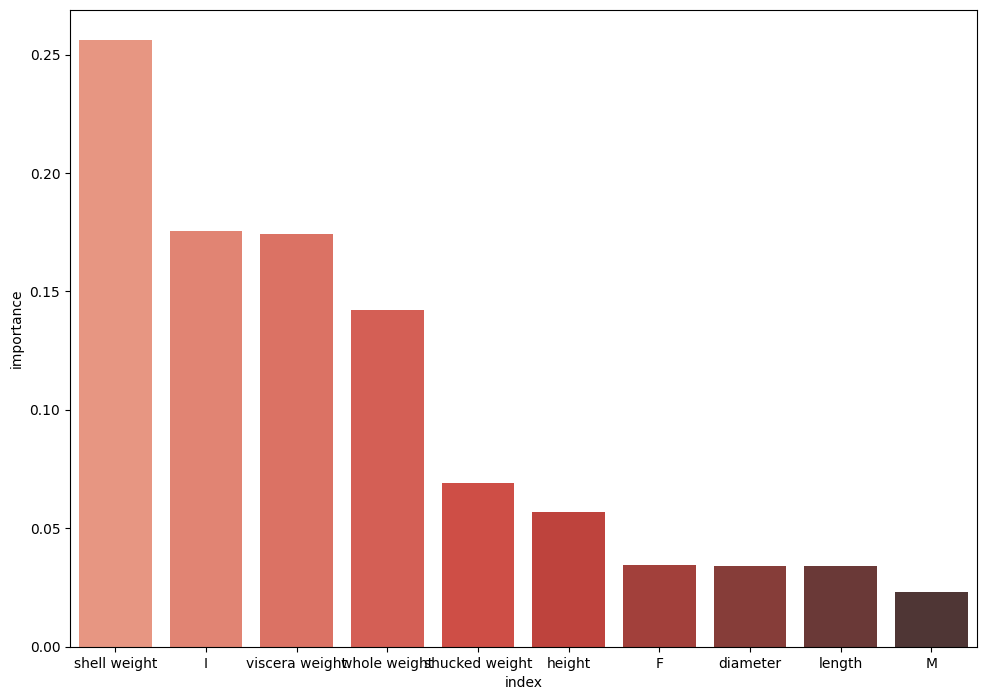

In [ ]:
# More exploration of Random Forest
# Show the importance of each feature
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
# Normalisasi data latih dan data uji
x_train = preprocessing.normalize(x_train)  # Menormalkan data latih agar memiliki distribusi yang seragam
x_test = preprocessing.normalize(x_test)  # Menormalkan data uji

# Membuat model RandomForestClassifier dengan parameter tertentu
clf = RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=30)
# max_depth=6: Kedalaman maksimal setiap pohon adalah 6.
# max_features='sqrt': Menggunakan akar kuadrat dari jumlah fitur untuk menentukan jumlah fitur yang digunakan dalam setiap pemisahan pohon.
# n_estimators=30: Jumlah pohon yang digunakan dalam model.

# Melatih model dengan data latih yang sudah dinormalisasi
clf.fit(x_train, y_train)

# Mendapatkan fitur penting dari model (feature importance)
imp = pd.DataFrame(clf.feature_importances_).reset_index()  # Mendapatkan nilai penting fitur dari model dan mengubahnya menjadi DataFrame
imp['index'] = data.columns.values[:-1]  # Menambahkan nama kolom (fitur) ke DataFrame, kecuali kolom terakhir (label)
imp.columns = ['index', 'importance']  # Menetapkan nama kolom untuk DataFrame

# Mengurutkan fitur berdasarkan tingkat kepentingannya
order = imp.sort_values('importance', ascending=False)['index'].values  # Mengurutkan berdasarkan 'importance' secara menurun

# Membuat visualisasi grafik batang untuk menunjukkan pentingnya setiap fitur
fig = plt.subplots(figsize=(11.7, 8.27))  # Menetapkan ukuran grafik (A4)
sns.barplot(data=imp, x='index', y='importance', order=order, palette="Reds_d")  # Membuat grafik batang dengan Seaborn

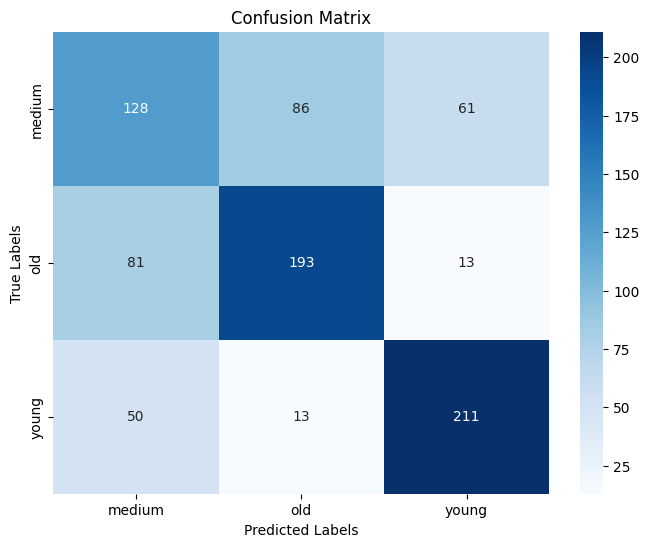

In [ ]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model_rf.classes_)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()